# Assignment 2. Linear regression. Polynomial features. Regularization
## General Assignment

Before performing the practical work, you need download the dataset accordingly to the option on your machine (or cloud service)
1. Write a program that splits the original sample into a training set and a test set (training set, validation set, test set) with train_test_split method of Skikit Learn library
2. Using the scikit-learn library (http://scikit-learn.org/stable/), train the linear regression model for the training sample (example: http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py)
3. Check the accuracy of the model from the test set
4. Build a model using a polynomial function (example: http://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html#sphx-glr-auto-examples-model-selection-plot-underfitting-overfitting-py). Build plots with the dependence of the accuracy (r2 or accuracy or score) on the degree of the polynomial function.
5. Build a model using regularization (example: http://scikit-learn.org/stable/modules/linear_model.html). On the basis of experiments, select parameters for regularization. Build plots with the dependence of the error on the regularization coefficient.


## Options
Data sets are taken from the [UCI Machine Learning Repository]
(https://archive.ics.uci.edu/ml/datasets.php)
The option is determined by the data set, which can be downloaded from the link above:
1. Condition Based Maintenance of Naval Propulsion Plants
2. UJIIndoorLoc
3. Insurance Company Benchmark (COIL 2000)
4. KDD Cup 1998 Data
5. [Forest Fires](https://www.kaggle.com/elikplim/predict-the-burned-area-of-forest-fires)
6. Concrete Compressive Strength
7. Concrete Slump Test
8. Communities and Crime
9. Parkinsons Telemonitoring
10. YearPredictionMSD
11. Relative location of CT slices on axial axis
12. Individual household electric power consumption
13. **Energy efficiency**
14. 3D Road Network (North Jutland, Denmark)
15. ISTANBUL STOCK EXCHANGE
16. Buzz in social media
17. Physicochemical Properties of Protein Tertiary Structure
18. Gas Sensor Array Drift Dataset at Different Concentrations
19. SkillCraft1 Master Table Dataset
20. SML2010
21. Bike Sharing Dataset
22. Combined Cycle Power Plant
23. BlogFeedback




In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

# import data
dataset = pd.read_excel("./Assignment_Data/energy_efficiency_dataset.xlsx")
dataset = dataset.rename(columns={"X1" : "Relative Compactness", "X2" : "Surface Area", "X3" : "Wall Area",
           "X4" : "Roof Area", "X5" : "Overall Height", "X6" : "Orientation",
           "X7" : "Glazing Area", "X8" : "Glazing Area Distribution", "Y1" : "Heating Load",
           "Y2" : "Cooling Load"}, errors="raise")

features = ["Relative Compactness", "Surface Area", "Wall Area", "Roof Area","Overall Height", "Orientation",
           "Glazing Area", "Glazing Area Distribution"]
targets= ["Heating Load", "Cooling Load"]

In [11]:
# scale data

scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset)
scaled_data = pd.DataFrame(scaled_data, columns=features+targets)
print(scaled_data.head(5))

   Relative Compactness  Surface Area  Wall Area  Roof Area  Overall Height  \
0              2.041777     -1.785875  -0.561951  -1.470077             1.0   
1              2.041777     -1.785875  -0.561951  -1.470077             1.0   
2              2.041777     -1.785875  -0.561951  -1.470077             1.0   
3              2.041777     -1.785875  -0.561951  -1.470077             1.0   
4              1.284979     -1.229239   0.000000  -1.198678             1.0   

   Orientation  Glazing Area  Glazing Area Distribution  Heating Load  \
0    -1.341641     -1.760447                  -1.814575     -0.670115   
1    -0.447214     -1.760447                  -1.814575     -0.670115   
2     0.447214     -1.760447                  -1.814575     -0.670115   
3     1.341641     -1.760447                  -1.814575     -0.670115   
4    -1.341641     -1.760447                  -1.814575     -0.145503   

   Cooling Load  
0     -0.342666  
1     -0.342666  
2     -0.342666  
3     -0.34266

In [12]:
# split data into training and test set

#data_train, data_test = train_test_split(dataset)

#data_train_X = data_train[features]
#data_test_X = data_test[features]
#data_train_y = data_train[targets]
#data_test_y = data_test[targets]

data_train_X, data_test_X, data_train_y, data_test_y = train_test_split(dataset[features], dataset[targets])

In [13]:
# train model

model = linear_model.LinearRegression()
model.fit(data_train_X, data_train_y)



LinearRegression()

In [14]:
prediction = model.predict(data_test_X)

# The coefficients
print('Coefficients: \n', model.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(data_test_y, prediction))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(data_test_y, prediction)) # 100% is perfect correlation => perfect model

Coefficients: 
 [[-6.14807446e+01 -1.58382291e+12  1.58382291e+12  3.16764583e+12
   4.18368530e+00 -1.28399551e-01  2.03735029e+01  2.37956598e-01]
 [-6.84333654e+01 -1.20794095e+11  1.20794095e+11  2.41588191e+11
   4.35639071e+00 -2.03734711e-02  1.50249020e+01  4.78677684e-02]]
Mean squared error: 9.22
Variance score: 0.91


In [15]:
pred_1 = []
pred_2 = []
for i in range(0,len(prediction)):
    pred_1.append(prediction[i][0])
    pred_2.append(prediction[i][1])

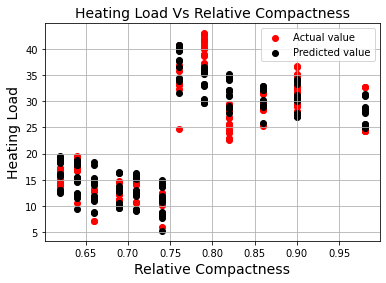

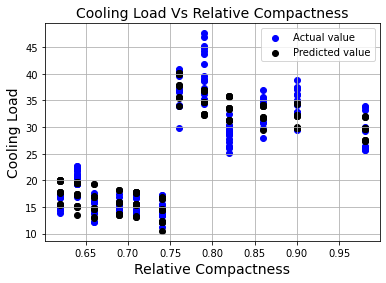

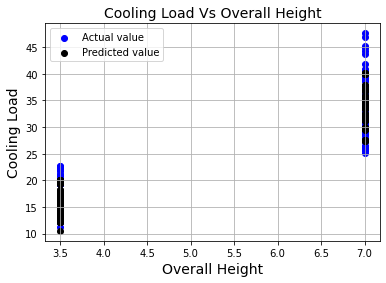

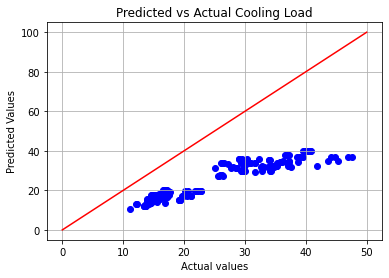

In [16]:
plt.scatter(data_test_X[features[0]], data_test_y[targets[0]], color='red', label="Actual value")
plt.scatter(data_test_X[features[0]], pred_1, color='black', label="Predicted value")
#plt.plot(data_test_X[features[0]], prediction)
plt.title('Heating Load Vs Relative Compactness', fontsize=14)
plt.xlabel('Relative Compactness', fontsize=14)
plt.ylabel('Heating Load', fontsize=14)
plt.grid(True)
plt.legend(loc="best")
plt.show()

plt.scatter(data_test_X[features[0]], data_test_y[targets[1]], color='blue', label="Actual value")
plt.scatter(data_test_X[features[0]], pred_2, color='black', label="Predicted value")
plt.title('Cooling Load Vs Relative Compactness', fontsize=14)
plt.xlabel('Relative Compactness', fontsize=14)
plt.ylabel('Cooling Load', fontsize=14)
plt.grid(True)
plt.legend(loc="best")
plt.show()

plt.scatter(data_test_X[features[4]], data_test_y[targets[1]], color='blue', label="Actual value")
plt.scatter(data_test_X[features[4]], pred_2, color='black', label="Predicted value")
plt.title('Cooling Load Vs Overall Height', fontsize=14)
plt.xlabel('Overall Height', fontsize=14)
plt.ylabel('Cooling Load', fontsize=14)
plt.grid(True)
plt.legend(loc="best")
plt.show()

plt.scatter(data_test_y[targets[1]],pred_2, color='blue')
line_x = np.linspace(0,50,100)
line_y = 2*line_x
plt.plot(line_x,line_y, '-r', label='Ideal values')
plt.title("Predicted vs Actual Cooling Load")
plt.xlabel("Actual values")
plt.ylabel("Predicted Values")
plt.plot()
plt.grid(True)
plt.show()

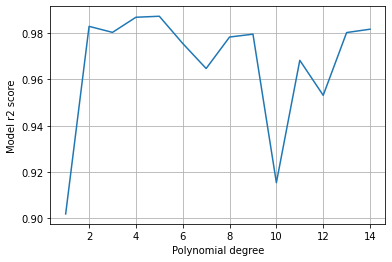

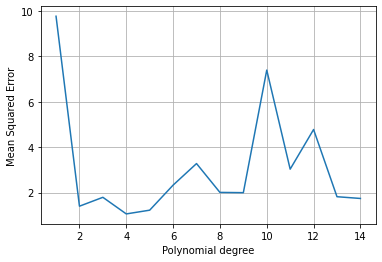

In [53]:
# 4. polynomial features

r2_list = []
mean_squared_error_list = []
degrees = range(1,15)
for i in range(len(degrees)):
    # create polynomial features
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
   
    features_data = dataset[features].copy()
    targets_data = dataset[targets].copy()
   
    poly_dataset = polynomial_features.fit_transform(features_data)
    # split data
    data_train_X, data_test_X, data_train_y, data_test_y = train_test_split(poly_dataset, targets_data)

    linear_regression = linear_model.LinearRegression()
    model = linear_regression.fit(data_train_X, data_train_y)

    prediction = model.predict(data_test_X)

    r2score = r2_score(data_test_y, prediction)
    mse = mean_squared_error(data_test_y, prediction)
    
    mean_squared_error_list.append(mse)
    
    r2_list.append(r2score)

    
plt.plot(degrees,r2_list)
plt.grid(True)
plt.xlabel("Polynomial degree")
plt.ylabel("Model r2 score")
plt.show()

plt.plot(degrees,mean_squared_error_list)
plt.grid(True)
plt.xlabel("Polynomial degree")
plt.ylabel("Mean Squared Error")
plt.show()


In [62]:
max_element = np.max(r2_list)
poly_degree = np.where(r2_list == max_element)[0] + 1


print(f"Max r2 score: {max_element}",f"Polynomial Degree: {poly_degree}", sep='\n')

Max r2 score: 0.9873169319452121
Polynomial Degree: [5]


In [ ]:
# 5. Regularization